MODEL

In [1]:
import numpy as np
import os

root = r'C:\Users\KIIT\Tensorflow\Face_mask_detection'
data_path = os.path.join(root, 'Data.npy')
label_path = os.path.join(root, 'Labels.npy')

# Load Data and Lables
data = np.load(data_path)
labels = np.load(label_path)

Build Model

In [2]:
# https://stackoverflow.com/questions/44131295/keras-cannot-import-name-conv2d
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [3]:
model = Sequential()

model.add(Conv2D(256, (5,5), padding='same', input_shape = data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(32, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 256)     6656      
_________________________________________________________________
activation_1 (Activation)    (None, 100, 100, 256)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 128)       295040    
_________________________________________________________________
activation_2 (Activation)    (None, 48, 48, 128)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 64)       

In [15]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, train_size = 0.9)

## size of Data points
print('Training Data Shape', train_data.shape)
print('Testing Data Shape',test_data.shape)

## size of Labels
print('Training Labels Shape',train_labels.shape)
print('Testing Labels Shape',test_labels.shape)

Training Data Shape (6797, 100, 100, 1)
Testing Data Shape (756, 100, 100, 1)
Training Labels Shape (6797, 2)
Testing Labels Shape (756, 2)


In [16]:
## https://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/
## https://stackoverflow.com/questions/47902295/what-is-the-use-of-verbose-in-keras-while-validating-the-model
## https://keras.io/api/callbacks/model_checkpoint/
checkpoint = ModelCheckpoint('Model_{epoch:02d}.model', monitor='val_loss', verbose=2, save_best_only = True, mode='auto')
history = model.fit(train_data, train_labels, epochs=20, callbacks=[checkpoint], validation_split = 0.2)

Train on 5437 samples, validate on 1360 samples
Epoch 1/20
ERROR! Session/line number was not unique in database. History logging moved to new session 127
5437/5437 [==============================] - 409s 75ms/step - loss: 0.6554 - accuracy: 0.6070 - val_loss: 0.5935 - val_accuracy: 0.6566

Epoch 00001: val_loss improved from inf to 0.59353, saving model to Model_01.model
Epoch 2/20
5437/5437 [==============================] - 390s 72ms/step - loss: 0.5219 - accuracy: 0.7420 - val_loss: 0.3969 - val_accuracy: 0.8346

Epoch 00002: val_loss improved from 0.59353 to 0.39690, saving model to Model_02.model
Epoch 3/20
5437/5437 [==============================] - 384s 71ms/step - loss: 0.4070 - accuracy: 0.8106 - val_loss: 0.4031 - val_accuracy: 0.8132

Epoch 00003: val_loss did not improve from 0.39690
Epoch 4/20
5437/5437 [==============================] - 376s 69ms/step - loss: 0.3643 - accuracy: 0.8304 - val_loss: 0.3263 - val_accuracy: 0.8596

Epoch 00004: val_loss improved from 0.39690

Training Loss vs Validation Loss

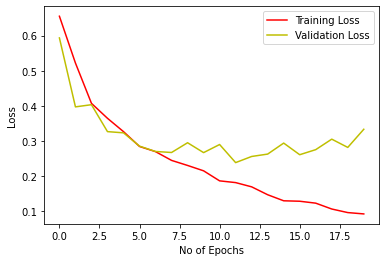

In [18]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'], 'r', label='Training Loss')
plt.plot(history.history['val_loss'], 'y', label='Validation Loss')
plt.xlabel('No of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Training Accuracy vs Validation Accuracy

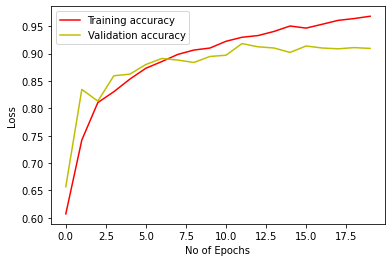

In [19]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'], 'r', label='Training accuracy')
plt.plot(history.history['val_accuracy'], 'y', label='Validation accuracy')
plt.xlabel('No of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Model Performance

In [20]:
print(model.evaluate(test_data, test_labels))

756/756 [==============================] - 13s 17ms/step
[0.3565999528087636, 0.8928571343421936]
